In [1]:
import tensorflow as tf
import re
import collections
import functools

In [2]:
#file load

f = open('data/content_list.csv','r')
line_counter = 0
unsupport_title_counter = 0
title_arr = []
ctr_arr = []

ex_hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글과 띄어쓰기를 제외한 모든 글자
def map_hangul(str):
    str = str.replace('_',' ')
    str = ex_hangul.sub('',str)
    str = str.replace('  ',' ')
    return str

while True:    
    line = f.readline()
    if not line: break
    line_counter += 1
    
    line = line.replace('""',' ')
    content_info = line.split('"')
    
    try:
        title = map_hangul(content_info[1])
        ctr = content_info[2].split(',')[1]
        title_arr.append(title)
        ctr_arr.append([float(ctr)])
        if line_counter % 10000 == 0:
            print(line_counter, ":", title, ctr)
    except:
        unsupport_title_counter += 1
        
print('총 라인 수 : ', line_counter)
print('타이틀 수 : ', len(title_arr))
print('CTR 수 : ', len(ctr_arr))
print('에러 수 : ',unsupport_title_counter)
    
print(title_arr[:5])
print(ctr_arr[:5])

10000 : 마케팅 연애의목적 0.0043
20000 : 콘텐츠 스포티비 기자회견장에서 화보 찍는 체조요정들 0.0071
30000 : 뉴스 스브스뉴스 스토리카드 그 사람이 사랑하는 방법 0.0128
40000 : 뉴스 엑스트라계의 최수종 갓스트라 스브스뉴스 스토리카드  0.0071
50000 : 콘텐츠 따뜻한 커피도 체온을 떨어뜨린다  동영상  0.0073
총 라인 수 :  51850
타이틀 수 :  51826
CTR 수 :  51826
에러 수 :  24
['콘텐츠 보그걸 초강력 워터프루프', '콘텐츠 보그걸 셔츠 초간단 연출법', '콘텐츠 보그걸 센스 넘치는 여행 소품들', '콘텐츠 보그걸 부위별 셀프 운동법', '마케팅 중복이벤트']
[[0.0211], [0.0144], [0.0091], [0.0209], [0.0072]]


/home/tf_user/anaconda3/envs/tf/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


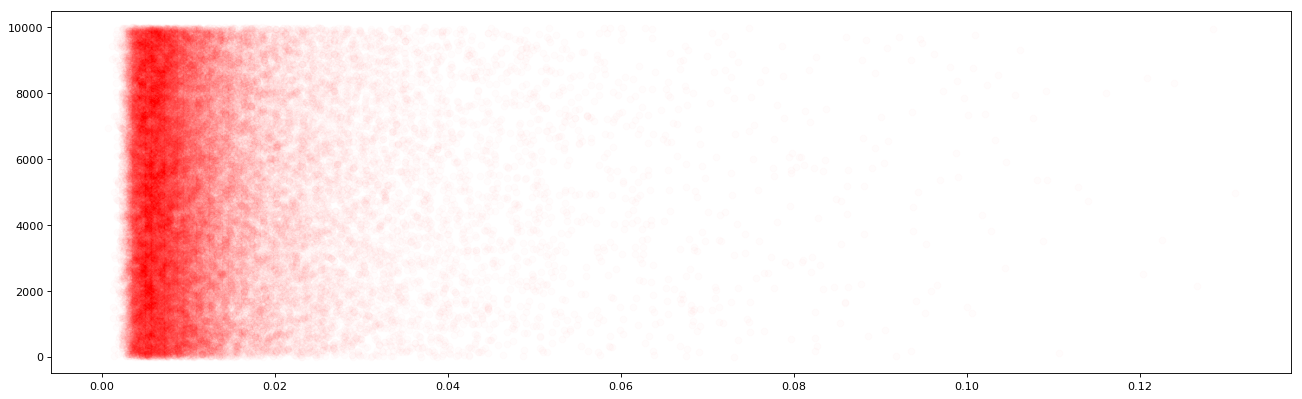

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

random_x = []
for i in range(len(ctr_arr)):
    random_x.append(random.randrange(1,10000))

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(ctr_arr, random_x, 'ro', alpha=0.01)
plt.legend()
plt.show()

In [4]:
#ctr에 grade를 매긴다
# grade = [0,0,0,0,0,0]
# ctr_grade_arr = []
# for ctr in ctr_arr:
#     if ctr[0] < 0.005:
#         grade[0] += 1
#         ctr_grade_arr.append([1,0,0,0,0,0])
#     elif ctr[0] >= 0.005 and ctr[0] < 0.01:
#         grade[1] += 1
#         ctr_grade_arr.append([0,1,0,0,0,0])
#     elif ctr[0] >= 0.01 and ctr[0] < 0.015:
#         grade[2] += 1
#         ctr_grade_arr.append([0,0,1,0,0,0])
#     elif ctr[0] >= 0.015 and ctr[0] < 0.02:
#         grade[3] += 1
#         ctr_grade_arr.append([0,0,0,1,0,0])
#     elif ctr[0] >= 0.02 and ctr[0] < 0.025:
#         grade[4] += 1
#         ctr_grade_arr.append([0,0,0,0,1,0])
#     elif ctr[0] >= 0.025:
#         grade[5] += 1
#         ctr_grade_arr.append([0,0,0,0,0,1])
# print(grade)
# print(ctr_grade_arr[:5])

grade = [0,0]
ctr_grade_arr = []
for ctr in ctr_arr:
    if ctr[0] < 0.015:
        grade[0] += 1
        ctr_grade_arr.append([1,0])
    else:
        grade[1] += 1
        ctr_grade_arr.append([0,1])
print(grade)
print(ctr_grade_arr[:5])

[40037, 11789]
[[0, 1], [1, 0], [1, 0], [0, 1], [1, 0]]


In [5]:
#dictionary를 만들기위해 단어만 주욱 모은다
words = functools.reduce(lambda x,y: x+' '+y, title_arr).split(' ')
print(len(words))
print(words[:10])

385207
['콘텐츠', '보그걸', '초강력', '워터프루프', '콘텐츠', '보그걸', '셔츠', '초간단', '연출법', '콘텐츠']


In [6]:
vocabulary_size = 20000

count = [['UNK', -1]] #unknown
count.extend(collections.Counter(words).most_common(vocabulary_size - 1))
print(len(count))
print(count[:20])

#dictionary 정의 & feeding
dictionary = dict()
for word, _ in count:
    dictionary[word] = len(dictionary) #여기서 word는 count를 돌린거라서 유니크함
print(len(dictionary))

unk_count = 0

#unknown counting
for word in words:
    if word not in dictionary:
        unk_count += 1
    
#title_arr 를 index값으로 title_vector_arr로 변환
title_vector_arr = []
for title in title_arr:
    title_vector = []
    word_arr = title.split(' ')
    for word in word_arr:
        if word in dictionary:
            index = dictionary[word]
        else:
            index = 0
        title_vector.append(index)
    title_vector_arr.append(title_vector)
    
count[0][1] = unk_count
reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))

# del words  # Hint to reduce memory.
print('Most common words (+UNK)', count[:5])
print('Title vector array sample', title_vector_arr[:10])
for title_vector in title_vector_arr[:10]:
    print('Reverse dict', [reverse_dictionary[word_index] for word_index in title_vector])
print(len(title_vector_arr))

20000
[['UNK', -1], ('콘텐츠', 30932), ('뉴스', 18788), ('', 17489), ('스토리카드', 7022), ('오후', 6335), ('오전', 5251), ('저녁', 5074), ('중앙일보', 4114), ('한국일보', 3521), ('엘르', 2432), ('전자신문', 2173), ('동영상', 2091), ('아시아투데이', 2064), ('동아일보', 1837), ('코스모폴리탄', 1496), ('스포츠조선', 1238), ('조선일보', 1181), ('남자', 1169), ('여자', 1033)]
20000
Most common words (+UNK) [['UNK', 56045], ('콘텐츠', 30932), ('뉴스', 18788), ('', 17489), ('스토리카드', 7022)]
Title vector array sample [[1, 53, 8025, 11770], [1, 53, 1041, 487, 2391], [1, 53, 2997, 1872, 95, 0], [1, 53, 10875, 596, 802], [25, 0], [1, 20, 7336, 14428, 6], [1, 20, 3644, 0, 5], [2, 8, 0, 0, 0, 10410, 0, 0, 10748, 7], [2, 8, 2775, 0, 18454, 12931, 918, 9887, 200, 1076, 7], [2, 9, 2890, 72, 1833, 19905, 520, 543, 7]]
Reverse dict ['콘텐츠', '보그걸', '초강력', '워터프루프']
Reverse dict ['콘텐츠', '보그걸', '셔츠', '초간단', '연출법']
Reverse dict ['콘텐츠', '보그걸', '센스', '넘치는', '여행', 'UNK']
Reverse dict ['콘텐츠', '보그걸', '부위별', '셀프', '운동법']
Reverse dict ['마케팅', 'UNK']
Reverse dict ['콘텐츠', '아이즈', '이국주

In [7]:
# max_length = 0
# for title_vector in title_vector_arr:
#     if max_length < len(title_vector):
#         max_length = len(title_vector)
# print(max_length)

max_length = 20
#vector 사이즈를 정의하고, 부족한 부분은 empty_index로 채워서 사이즈를 맞춘다
empty_index = 0
title_vector_size = max_length
index = 0
for title_vector in title_vector_arr:
    while(len(title_vector) < title_vector_size):
        title_vector.append(empty_index)
    title_vector_arr[index] = title_vector[0:max_length]
    index +=1
print('Title vector array sample', title_vector_arr[:10])


Title vector array sample [[1, 53, 8025, 11770, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 53, 1041, 487, 2391, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 53, 2997, 1872, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 53, 10875, 596, 802, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 20, 7336, 14428, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 20, 3644, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 8, 0, 0, 0, 10410, 0, 0, 10748, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 8, 2775, 0, 18454, 12931, 918, 9887, 200, 1076, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 9, 2890, 72, 1833, 19905, 520, 543, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [8]:
import random
def generate_batch(title_vector_arr, ctr_grade_arr, batch_size):
    total_size = len(title_vector_arr)
    index_arr = [int(total_size*random.random()) for i in range(100)]
    batch_title = []
    batch_label = []
    for i in index_arr:
        batch_title.append(title_vector_arr[i])
        batch_label.append(ctr_grade_arr[i])
    return batch_title, batch_label

In [9]:
def xavier_init(n_inputs, n_outputs):
    init_range = tf.sqrt(6.0/(n_inputs+n_outputs))
    return tf.random_uniform_initializer(-init_range, init_range)

grade_size = len(grade)

X = tf.placeholder(tf.float32, shape=(None, title_vector_size), name='title_vector_arr')
Y = tf.placeholder(tf.float32, shape=(None, grade_size), name='ctr_grade_arr')

neuron_width = 1000

with tf.name_scope('hidden1') as scope:
    W1 = tf.get_variable(shape=[title_vector_size, neuron_width], initializer=xavier_init(title_vector_size, neuron_width), name='hidden1')
    b1 = tf.Variable(tf.zeros([neuron_width]), name='bias1')

with tf.name_scope('hidden2') as scope:
    W2 = tf.get_variable(shape=[neuron_width, neuron_width], initializer=xavier_init(neuron_width, neuron_width), name='hidden2')
    b2 = tf.Variable(tf.zeros([neuron_width]), name='bias2')

with tf.name_scope('hidden3') as scope:
    W3 = tf.get_variable(shape=[neuron_width, neuron_width], initializer=xavier_init(neuron_width, neuron_width), name='hidden3')
    b3 = tf.Variable(tf.zeros([neuron_width]), name='bias3')

with tf.name_scope('hidden4') as scope:
    W4 = tf.get_variable(shape=[neuron_width, neuron_width], initializer=xavier_init(neuron_width, neuron_width), name='hidden4')
    b4 = tf.Variable(tf.zeros([neuron_width]), name='bias4')

with tf.name_scope('hidden5') as scope:
    W5 = tf.get_variable(shape=[neuron_width, neuron_width], initializer=xavier_init(neuron_width, neuron_width), name='hidden5')
    b5 = tf.Variable(tf.zeros([neuron_width]), name='bias5')

with tf.name_scope('hidden6') as scope:
    W6 = tf.get_variable(shape=[neuron_width, neuron_width], initializer=xavier_init(neuron_width, neuron_width), name='hidden6')
    b6 = tf.Variable(tf.zeros([neuron_width]), name='bias6')

with tf.name_scope('hidden7') as scope:
    W7 = tf.get_variable(shape=[neuron_width, grade_size], initializer=xavier_init(neuron_width, grade_size), name='hidden7')
    b7 = tf.Variable(tf.zeros([grade_size]), name='bias7')


In [ ]:
def xavier_init(n_inputs, n_outputs):
    init_range = tf.sqrt(6.0/(n_inputs+n_outputs))
    return tf.random_uniform_initializer(-init_range, init_range)

grade_size = len(grade)

X = tf.placeholder(tf.float32, shape=(None, title_vector_size, 1), name='title_vector_arr')
X = tf.expand_dims(X, -1)

Y = tf.placeholder(tf.float32, shape=(None, grade_size), name='ctr_grade_arr')

neuron_width = 1000

with tf.name_scope('hidden1') as scope:
    W1 = tf.get_variable(shape=[title_vector_size, neuron_width, 1], initializer=xavier_init(title_vector_size, neuron_width), name='hidden1')

with tf.name_scope('hidden2') as scope:
    W2 = tf.get_variable(shape=[neuron_width, neuron_width, 1], initializer=xavier_init(neuron_width, neuron_width), name='hidden2')

with tf.name_scope('hidden3') as scope:
    W3 = tf.get_variable(shape=[neuron_width, neuron_width, 1], initializer=xavier_init(neuron_width, neuron_width), name='hidden3')

with tf.name_scope('hidden4') as scope:
    W7 = tf.get_variable(shape=[neuron_width, grade_size], initializer=xavier_init(neuron_width, grade_size), name='hidden7')
    b7 = tf.Variable(tf.zeros([grade_size]), name='bias7')

learning_rate = 0.1
print(X)
print(W1)
print(b1)
C1 = tf.nn.conv1d
L2 = tf.nn.softmax(tf.matmul(X, W1) + b1)
L3 = tf.nn.softmax(tf.matmul(L2, W2) + b2)
# L4 = tf.nn.relu(tf.matmul(L3, W3) + b3)
# L5 = tf.nn.relu(tf.matmul(L4, W4) + b4)
# L6 = tf.nn.relu(tf.matmul(L5, W5) + b5)
# L7 = tf.nn.relu(tf.matmul(L6, W6) + b6)
h = tf.nn.softmax(tf.matmul(L3, W7) + b7)
# h = tf.matmul(L2, W3) + b3

with tf.name_scope('cross_entropy'):
#     cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=h, labels=Y, name='cost'))
    cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(h), reduction_indices=1))
    tf.summary.scalar('cost', cost)

with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        correct_prediction = tf.equal(tf.argmax(h,1), tf.argmax(Y,1))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        tf.summary.scalar('accuracy', accuracy)
        
merged = tf.summary.merge_all()

In [10]:
learning_rate = 0.1
print(X)
print(W1)
print(b1)
L2 = tf.nn.softmax(tf.matmul(X, W1) + b1)
L3 = tf.nn.softmax(tf.matmul(L2, W2) + b2)
# L4 = tf.nn.relu(tf.matmul(L3, W3) + b3)
# L5 = tf.nn.relu(tf.matmul(L4, W4) + b4)
# L6 = tf.nn.relu(tf.matmul(L5, W5) + b5)
# L7 = tf.nn.relu(tf.matmul(L6, W6) + b6)
h = tf.nn.softmax(tf.matmul(L3, W7) + b7)
# h = tf.matmul(L2, W3) + b3

with tf.name_scope('cross_entropy'):
#     cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=h, labels=Y, name='cost'))
    cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(h), reduction_indices=1))
    tf.summary.scalar('cost', cost)

with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        correct_prediction = tf.equal(tf.argmax(h,1), tf.argmax(Y,1))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        tf.summary.scalar('accuracy', accuracy)
        
merged = tf.summary.merge_all()


Tensor("title_vector_arr:0", shape=(?, 20), dtype=float32)
Tensor("hidden1_1/read:0", shape=(20, 1000), dtype=float32)
Tensor("hidden1/bias1/read:0", shape=(1000,), dtype=float32)


In [11]:
batch_size = 1000

acc_arr = []
step_arr = []

init = tf.global_variables_initializer()

sample_cost = 0
with tf.Session() as sess:
    train_writer = tf.summary.FileWriter('tensorboard/train',sess.graph)
    sess.run(init)
    for step in range(200):
        batch_title, batch_ctr = generate_batch(title_vector_arr, ctr_grade_arr, batch_size)
        tb_summary, _ = sess.run([merged,optimizer], feed_dict={X: batch_title, Y: batch_ctr})
        sample_cost = sess.run(cost, feed_dict={X: batch_title, Y: batch_ctr})
        acc= sess.run(accuracy, feed_dict={X: batch_title, Y: batch_ctr})
        h_sample= sess.run(h, feed_dict={X: batch_title, Y: batch_ctr})
        train_writer.add_summary(tb_summary, step)
        if step % 100 == 0:
            train_writer.add_summary(tb_summary, step)
            acc_arr.append(acc)
            step_arr.append(step)
            print(step,':', acc)
            print(h_sample[1])
            print('-------------------')


0 : 0.81
[ 0.60061228  0.39938775]
-------------------
100 : 0.81
[ 0.8121177   0.18788235]
-------------------
200 : 0.78
[ 0.77594262  0.22405736]
-------------------
300 : 0.73
[ 0.78579527  0.21420477]
-------------------
400 : 0.75
[ 0.77141607  0.22858398]
-------------------
500 : 0.81
[ 0.74712443  0.25287557]
-------------------
600 : 0.85
[ 0.77540451  0.22459556]
-------------------
700 : 0.69
[ 0.72803193  0.27196813]
-------------------
800 : 0.79
[ 0.75171912  0.24828087]
-------------------
900 : 0.74
[ 0.7585963   0.24140374]
-------------------
1000 : 0.75
[ 0.78465503  0.21534495]
-------------------
1100 : 0.77
[ 0.73590285  0.26409715]
-------------------
1200 : 0.76
[ 0.75950569  0.24049431]
-------------------
1300 : 0.72
[ 0.83465374  0.16534629]
-------------------
1400 : 0.79
[ 0.75371391  0.24628606]
-------------------
1500 : 0.78
[ 0.74698722  0.25301287]
-------------------
1600 : 0.76
[ 0.80837971  0.19162032]
-------------------
1700 : 0.8
[ 0.8097226   0

/home/tf_user/anaconda3/envs/tf/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


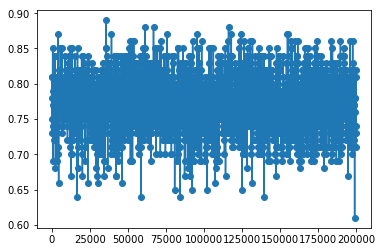

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(step_arr, acc_arr, '-o')
plt.legend()
plt.show()

In [ ]:
sample_index=9876
print(title_arr[sample_index])
print(title_vector_arr[sample_index])